### Predicting Gold Prices Using Machine Learning Regression Models

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the dataset

df=pd.read_csv('gold.csv')
df

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.50,280.00,283.7,21621,USD
1,2000-01-05,283.7,285.00,281.00,282.1,25448,USD
2,2000-01-06,281.6,282.80,280.20,282.4,19055,USD
3,2000-01-07,282.5,284.50,282.00,282.9,11266,USD
4,2000-01-10,282.4,283.90,281.80,282.7,30603,USD
...,...,...,...,...,...,...,...
5698,2022-08-29,1748.4,1757.90,1731.40,1749.7,156220,USD
5699,2022-08-30,1749.8,1752.80,1732.90,1736.3,130664,USD
5700,2022-08-31,1735.5,1738.00,1720.60,1726.2,176731,USD
5701,2022-09-01,1723.0,1723.00,1699.10,1709.3,198618,USD


In [3]:
# Dataset description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   object 
 1   Open      5703 non-null   float64
 2   High      5703 non-null   float64
 3   Low       5703 non-null   float64
 4   Close     5703 non-null   float64
 5   Volume    5703 non-null   int64  
 6   Currency  5703 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.0+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297
std,518.733377,522.353946,514.455903,518.524020,102537.449058
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,459.850000,463.900000,457.450000,460.500000,52938.500000
50%,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000
75%,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


In [5]:
# Check for missing values in the dataset

data = pd.read_csv('gold.csv')

missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Missing Values', ascending=False)

missing_summary


,Missing Values,Percentage
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Currency,0,0.0


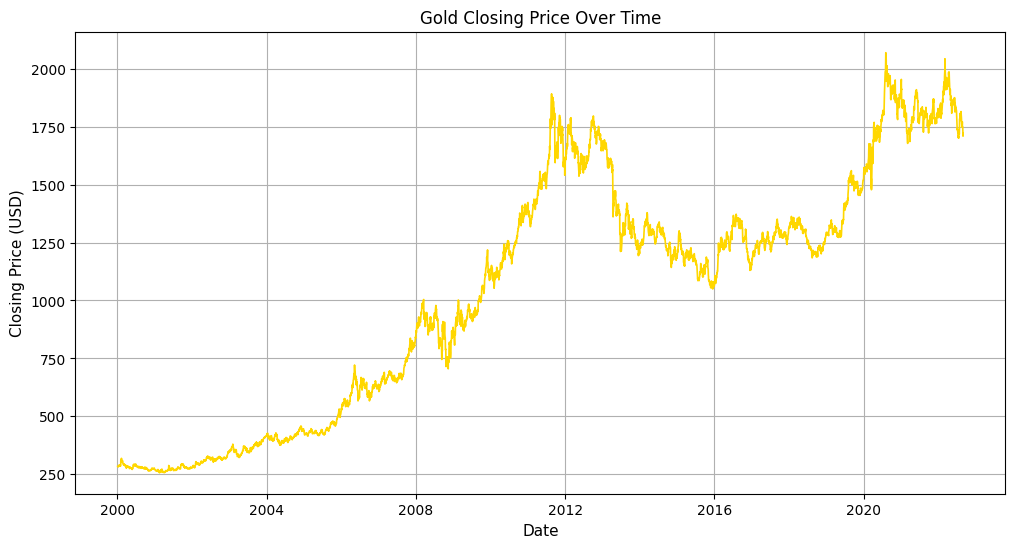

In [6]:
# How has the closing price of gold changed over time? (Line plot of 'Date' vs. 'Close')

import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format for time series plotting
data['Date'] = pd.to_datetime(data['Date'])

# Plotting Date vs. Close to observe how the closing price of gold has changed over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='gold', linewidth=1.2)
plt.title('Gold Closing Price Over Time')
plt.xlabel('Date', size= 11)
plt.ylabel('Closing Price (USD)', size= 11)
plt.grid(True)
plt.show()


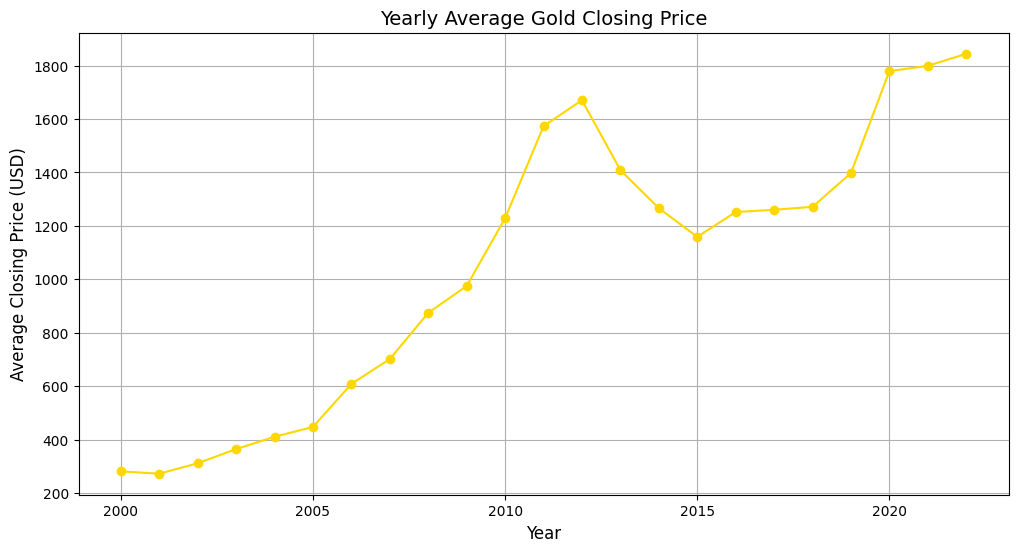

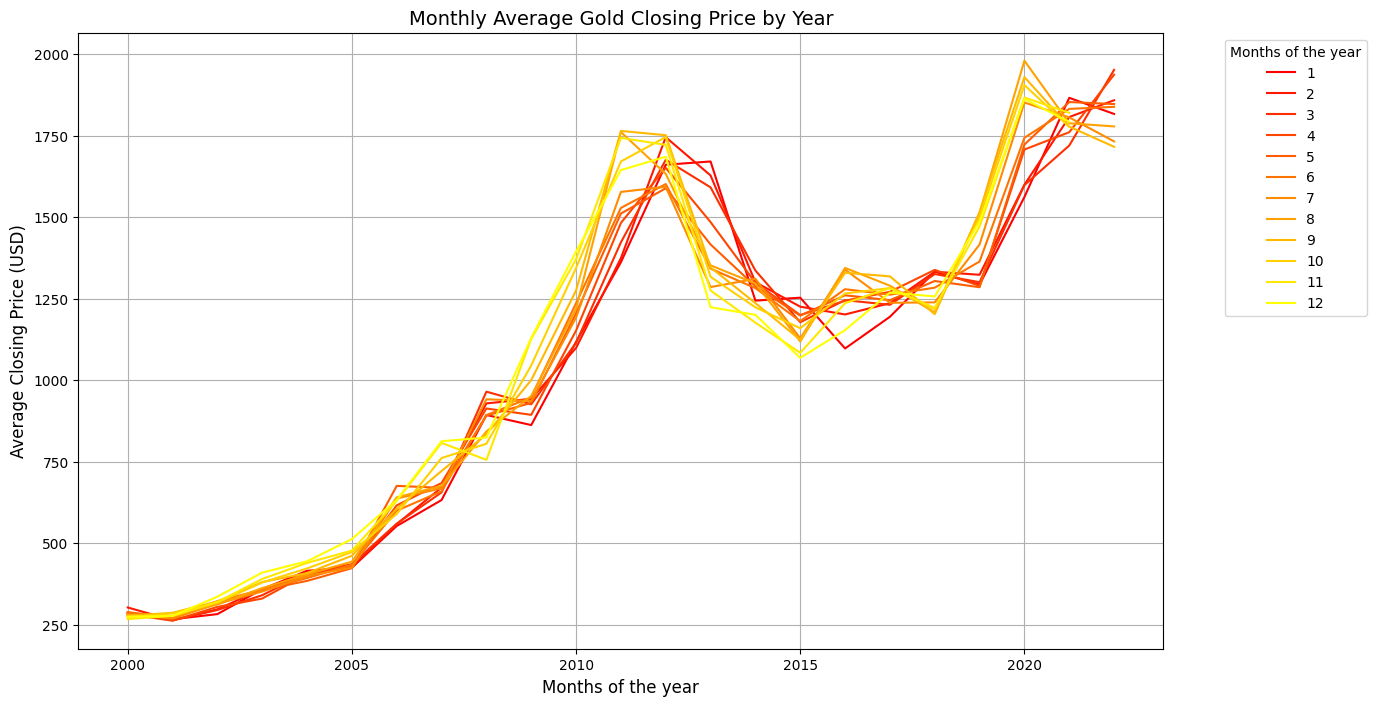

In [7]:
""" What are the trends in gold prices over different periods (e.g., yearly or monthly)? 
(Aggregate and plot 'Close' by year/month) """

# Extract year and month from the 'Date' column for aggregation
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Group by year and month and calculate the average closing price for each period
yearly_avg_close = data.groupby('Year')['Close'].mean()
monthly_avg_close = data.groupby(['Year', 'Month'])['Close'].mean().unstack()

# Plotting the yearly trend in average closing price
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_close.index, yearly_avg_close, color='gold', marker='o')
plt.title('Yearly Average Gold Closing Price', size= 14)
plt.xlabel('Year', size= 12)
plt.ylabel('Average Closing Price (USD)', size= 12)
plt.grid(True)
plt.show()

# Plotting the monthly trend in average closing price across years
plt.figure(figsize=(14, 8))
monthly_avg_close.plot(kind='line', colormap='autumn', linewidth=1.5, ax=plt.gca())
plt.title('Monthly Average Gold Closing Price by Year', size= 14)
plt.xlabel('Months of the year', size= 12)
plt.ylabel('Average Closing Price (USD)', size= 12)
plt.legend(title='Months of the year', bbox_to_anchor=(1.05, 1), loc='upper left') #(1 for January, 2 for February, etc.)
plt.grid(True)
plt.show()



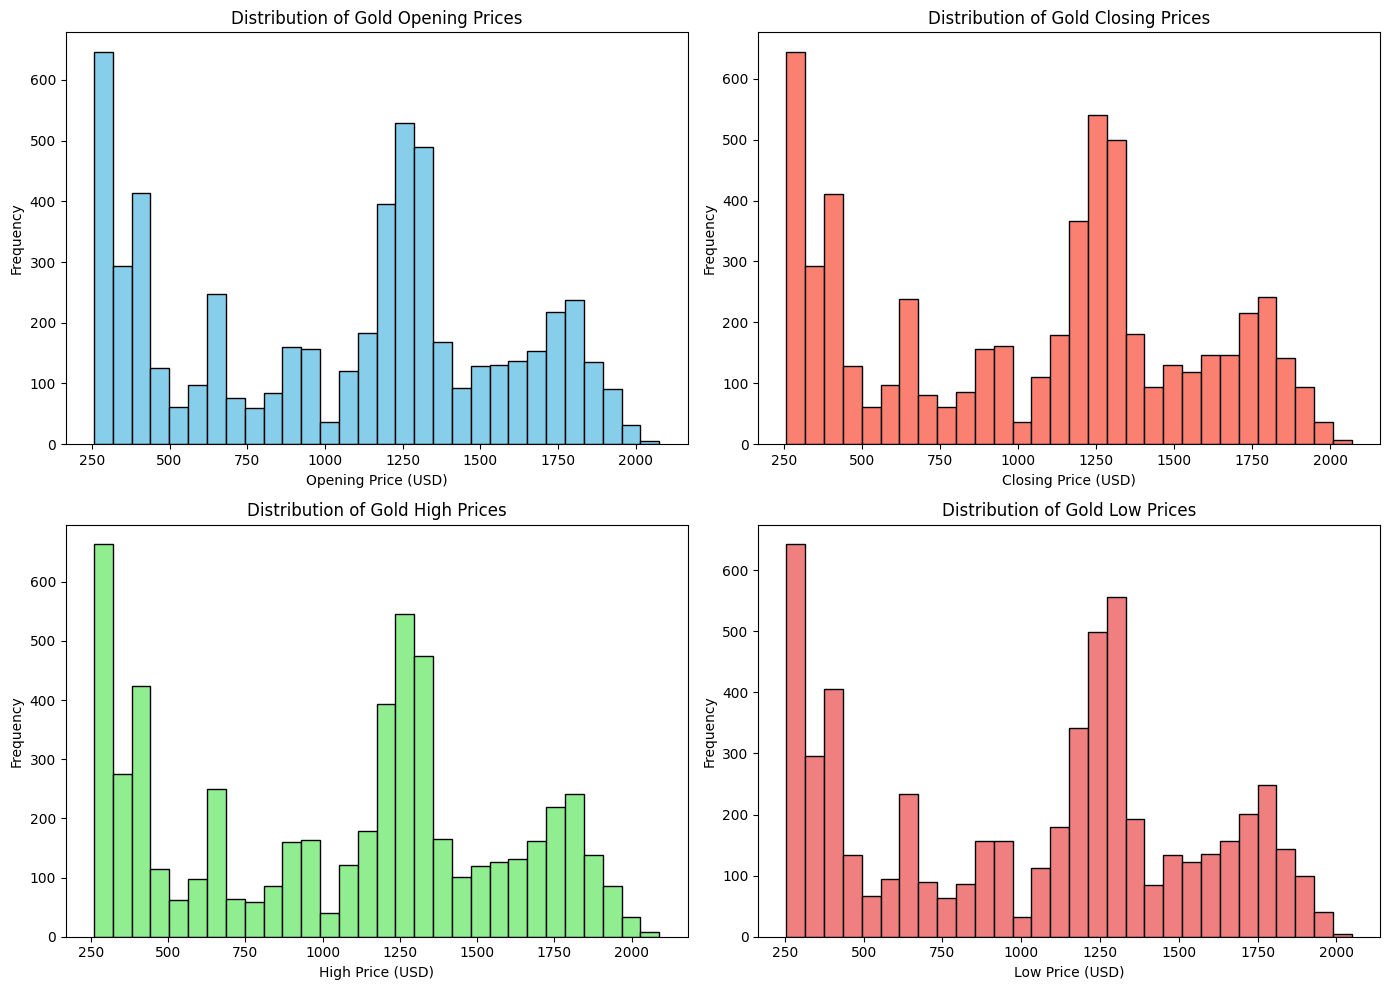

In [8]:
""" What is the overall distribution of gold’s opening, closing, high, and low prices? 
(Histogram for 'Open', 'Close', 'High', 'Low') """

import matplotlib.pyplot as plt

# Set up a figure with 2x2 subplots
plt.figure(figsize=(14, 10))

# Opening Price Distribution
plt.subplot(2, 2, 1)
plt.hist(data['Open'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Gold Opening Prices')
plt.xlabel('Opening Price (USD)')
plt.ylabel('Frequency')

# Closing Price Distribution
plt.subplot(2, 2, 2)
plt.hist(data['Close'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Gold Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')

# High Price Distribution
plt.subplot(2, 2, 3)
plt.hist(data['High'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Gold High Prices')
plt.xlabel('High Price (USD)')
plt.ylabel('Frequency')

# Low Price Distribution
plt.subplot(2, 2, 4)
plt.hist(data['Low'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Gold Low Prices')
plt.xlabel('Low Price (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


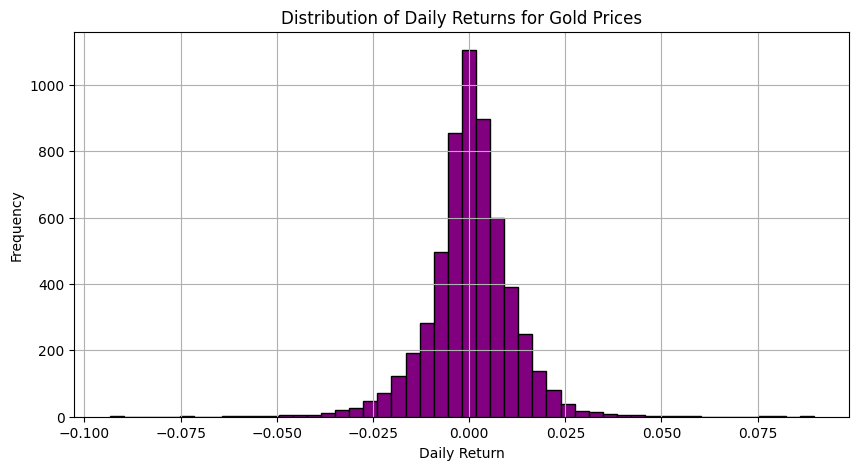

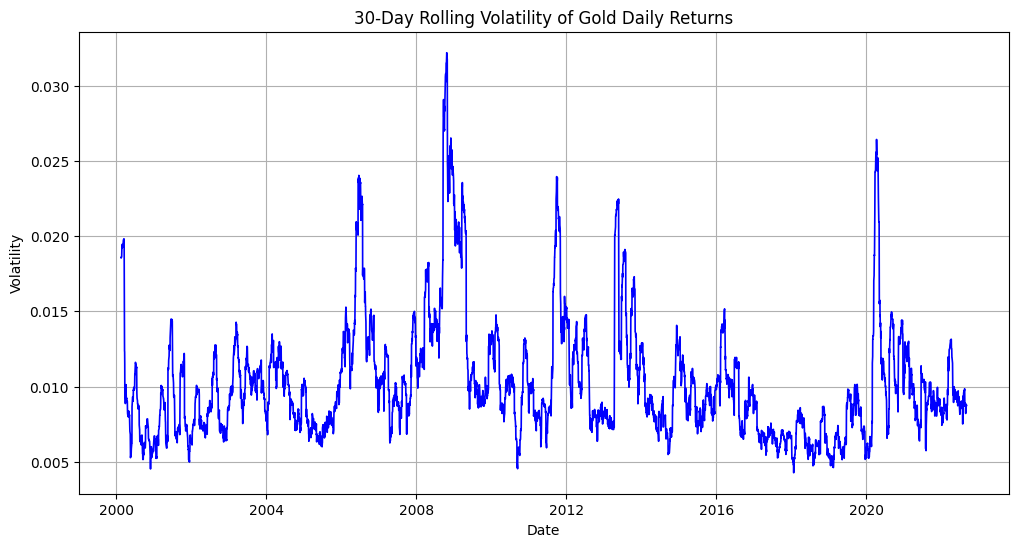

In [9]:
# How volatile is the gold price over time? (Calculate daily returns and plot distribution or volatility over time)

import matplotlib.pyplot as plt

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(10, 5))
plt.hist(data['Daily_Return'].dropna(), bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Daily Returns for Gold Prices')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate and plot rolling volatility (30-day rolling standard deviation of daily returns)
data['Rolling_Volatility'] = data['Daily_Return'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Rolling_Volatility'], color='blue', linewidth=1.2)
plt.title('30-Day Rolling Volatility of Gold Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


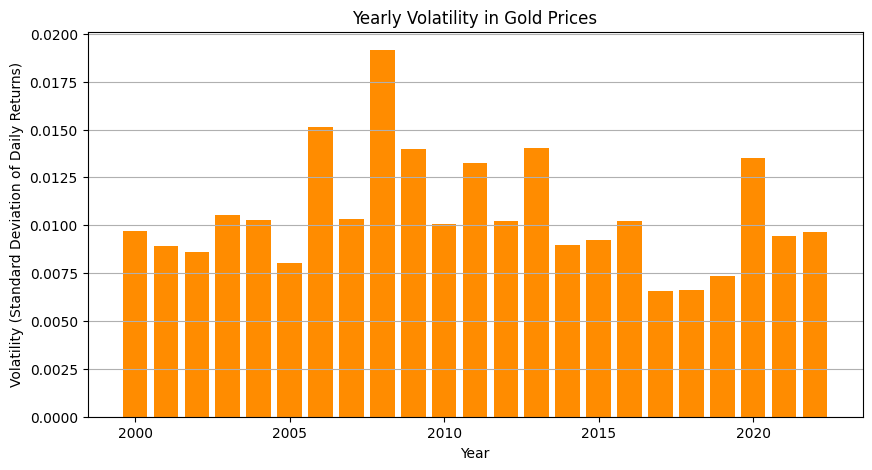

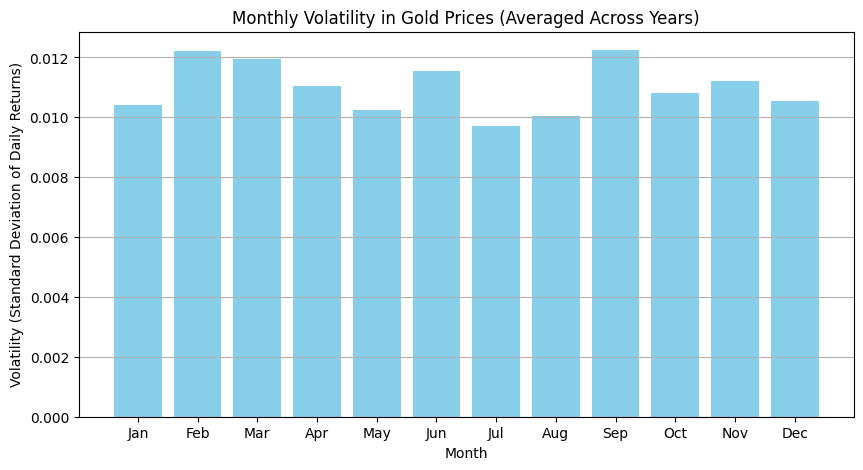

In [10]:
# Are there specific years or months where the price volatility was higher than others?

import matplotlib.pyplot as plt

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Calculate yearly volatility as the standard deviation of daily returns for each year
yearly_volatility = data.groupby(data['Date'].dt.year)['Daily_Return'].std()

# Calculate monthly volatility as the standard deviation of daily returns for each month across all years
monthly_volatility = data.groupby(data['Date'].dt.month)['Daily_Return'].std()

# Plot yearly volatility
plt.figure(figsize=(10, 5))
plt.bar(yearly_volatility.index, yearly_volatility, color='darkorange')
plt.title('Yearly Volatility in Gold Prices')
plt.xlabel('Year')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.grid(axis='y')
plt.show()

# Plot monthly volatility
plt.figure(figsize=(10, 5))
plt.bar(monthly_volatility.index, monthly_volatility, color='skyblue')
plt.title('Monthly Volatility in Gold Prices (Averaged Across Years)')
plt.xlabel('Month')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


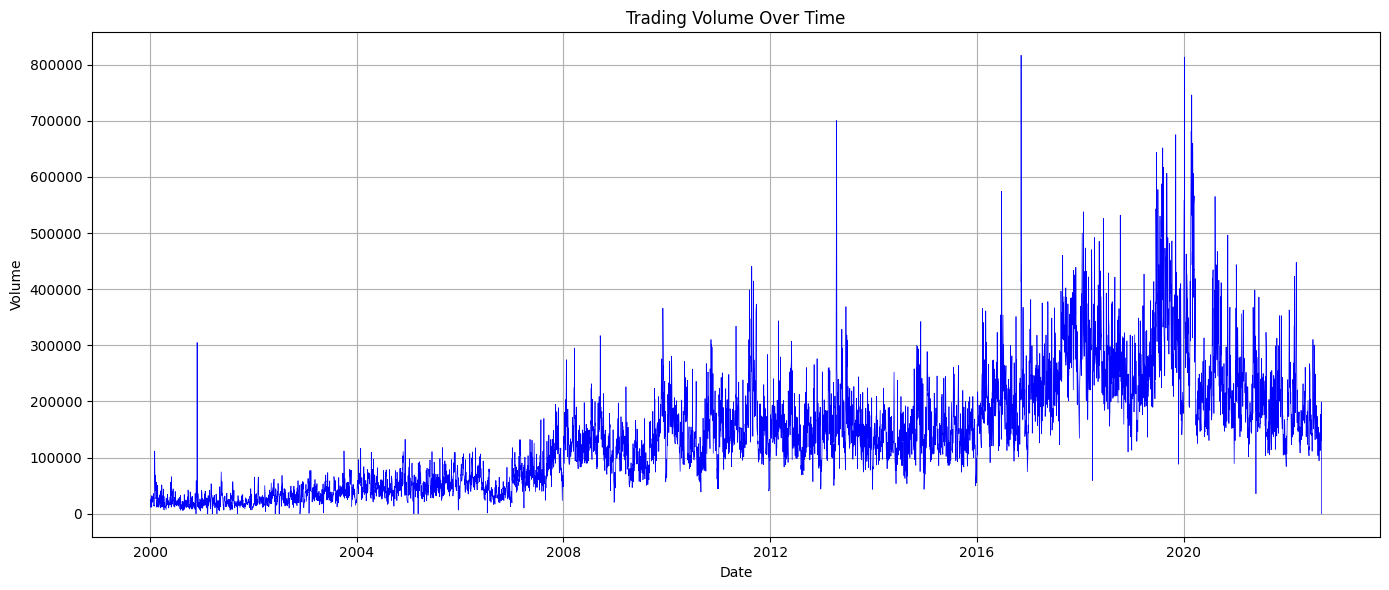

In [11]:
# What is the trend in trading volume over time? (Line plot of 'Date' vs. 'Volume')

import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Plot the trend of trading volume over time
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Volume'], color='blue', linewidth=0.5)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# How does trading volume correlate with changes in gold prices? 

# Convert 'Date' to datetime 
data['Date'] = pd.to_datetime(data['Date'])
data['Price_Change'] = data['Close'] - data['Open']

# Calculate correlation between 'Volume' and 'Price_Change'
correlation = data[['Volume', 'Price_Change']].corr().iloc[0, 1]
print(f"Correlation between trading volume and daily price change: {correlation}")


Correlation between trading volume and daily price change: -0.08184461949337453


Text(0.5, 1.0, 'Box Plot of Trading Volume (with Outliers)')

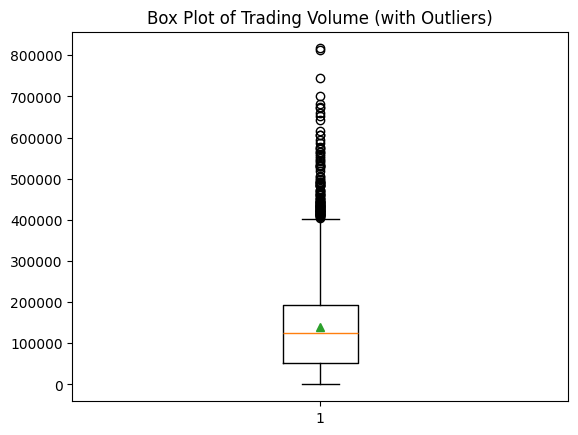

In [13]:
# Are there any days with unusually high or low trading volumes? (Identify outliers in 'Volume')


# box plot visualization
plt.boxplot(x = data['Volume'],showmeans = True)
plt.title('Box Plot of Trading Volume (with Outliers)')

In [14]:
# How do the open, high, low, and close prices correlate with each other?

from sklearn.preprocessing import LabelEncoder

data= pd.read_csv('gold.csv')
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply label encoding 
label_enc = LabelEncoder()
for col in categorical_cols:
    data[col] = label_enc.fit_transform(data[col])

# Recalculate correlation matrix with all features now numerical
full_correlation_matrix = data.corr()

# Display the full correlation matrix
full_correlation_matrix


,Date,Open,High,Low,Close,Volume,Currency
Date,1.000000,0.901709,0.901013,0.902800,0.901747,0.763260,NaN
Open,0.901709,1.000000,0.999879,0.999825,0.999740,0.692123,NaN
High,0.901013,0.999879,1.000000,0.999778,0.999861,0.693861,NaN
Low,0.902800,0.999825,0.999778,1.000000,0.999893,0.688983,NaN
Close,0.901747,0.999740,0.999861,0.999893,1.000000,0.690534,NaN
Volume,0.763260,0.692123,0.693861,0.688983,0.690534,1.000000,NaN
Currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Correlation between High and Low prices: 1.00


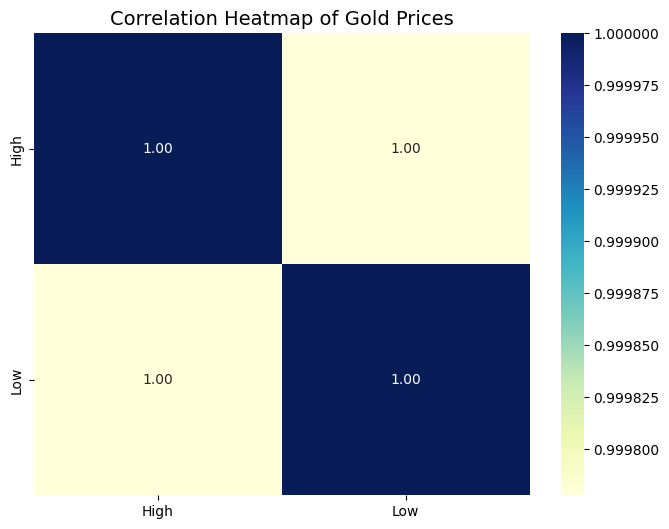

In [15]:
# How closely does the high price track with the low price ?(plot using heatmap)

high_low_corr = data['High'].corr(data['Low'])
print(f"Correlation between High and Low prices: {high_low_corr:.2f}")

import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the numerical price columns for correlation calculation
price_data = data[['High', 'Low']]

# Calculate the correlation matrix
correlation_matrix = price_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Gold Prices",size=14)
plt.show()

In [16]:
""" When are the golden cross (short-term average crosses above long-term average) 
and death cross (opposite) points observed? """

# Define short-term and long-term windows for moving averages
short_window = 50
long_window = 200

# Calculate the short-term and long-term moving averages based on the 'Close' price
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Identify Golden Cross and Death Cross points
data['Cross_Type'] = None  # Placeholder column for cross type
data.loc[(data['Short_MA'] > data['Long_MA']) & (data['Short_MA'].shift(1) <= data['Long_MA'].shift(1)), 'Cross_Type'] = 'Golden Cross'
data.loc[(data['Short_MA'] < data['Long_MA']) & (data['Short_MA'].shift(1) >= data['Long_MA'].shift(1)), 'Cross_Type'] = 'Death Cross'

# Filter for only the cross events
cross_events = data[['Date', 'Close', 'Short_MA', 'Long_MA', 'Cross_Type']].dropna(subset=['Cross_Type'])

# Display the cross events
cross_events


,Date,Close,Short_MA,Long_MA,Cross_Type
50,50,287.0,293.664,293.468627,Golden Cross
76,76,281.2,289.812,290.018182,Death Cross
364,364,273.4,268.930,268.822000,Golden Cross
1105,1105,385.2,395.378,395.718000,Death Cross
1172,1172,406.8,402.514,402.343500,Golden Cross
1350,1350,424.8,426.932,426.982000,Death Cross
1399,1399,450.9,431.940,431.805000,Golden Cross
1701,1701,587.6,604.616,605.527500,Death Cross
1740,1740,625.4,618.976,618.930000,Golden Cross
2175,2175,808.2,892.322,893.708500,Death Cross


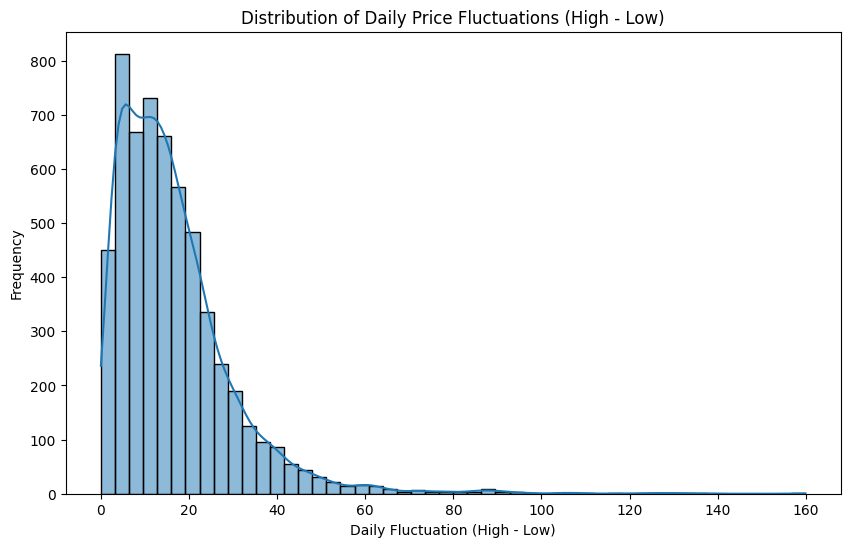

count    5703.000000
mean       16.476013
std        13.482290
min         0.000000
25%         7.100000
50%        13.700000
75%        21.700000
max       159.900000
Name: Daily_Fluctuation, dtype: float64

In [17]:
# How much does the price fluctuate daily (High - Low), and what is the distribution of this fluctuation?

# Calculate the daily price fluctuation as the difference between High and Low prices
data['Daily_Fluctuation'] = data['High'] - data['Low']

# Summary statistics for daily fluctuation
fluctuation_stats = data['Daily_Fluctuation'].describe()

# Plot the distribution of daily fluctuation
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily_Fluctuation'], bins=50, kde=True)
plt.title("Distribution of Daily Price Fluctuations (High - Low)")
plt.xlabel("Daily Fluctuation (High - Low)")
plt.ylabel("Frequency")
plt.show()

fluctuation_stats


In [42]:
# Which year had the highest average closing price and what is the highest avg close value?

data = pd.read_csv('gold.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Calculate the average closing price per year
average_close_per_year = data.groupby('Year')['Close'].mean()

# Find the year with the highest average closing price
year_highest_avg_close = average_close_per_year.idxmax()
highest_avg_close_value = average_close_per_year.max()

year_highest_avg_close, highest_avg_close_value


(2022, 1844.4739644970414)

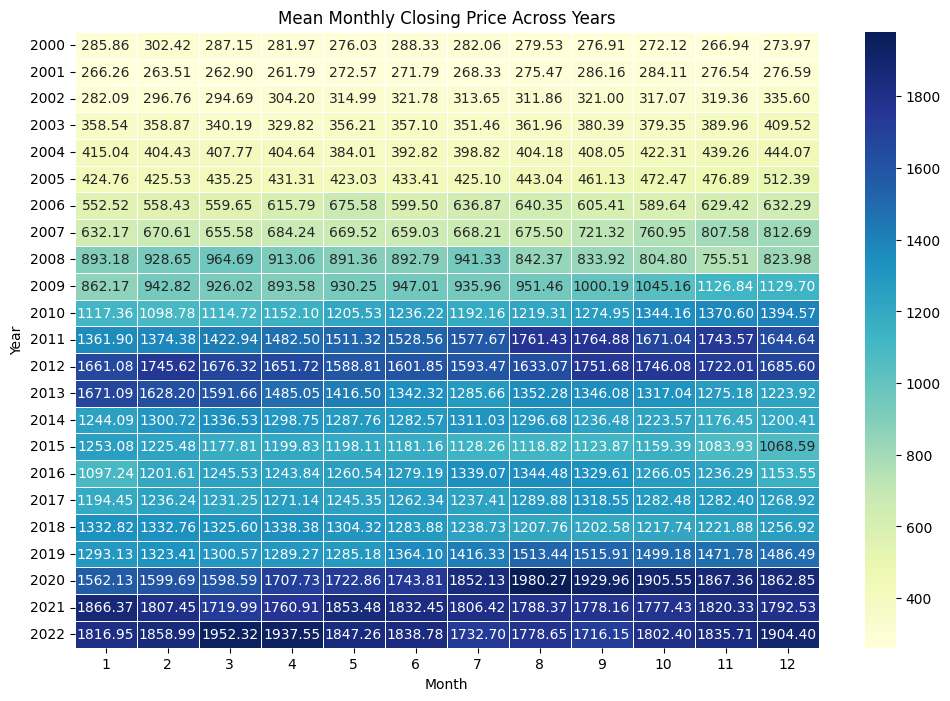

In [19]:
# How does each month’s average closing price compare across different years? (plot using Heatmap)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('gold.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract 'Year' and 'Month' columns for grouping
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Calculate the mean closing price for each month and year
monthly_mean = data.pivot_table(values='Close', index='Year', columns='Month', aggfunc='mean')

# Fill the missing Values in 2022 year's 10,11,12 columns with the Random Values Near Mean of Other Months)
if 2022 in monthly_mean.index:
    avg_other_months_2022 = monthly_mean.loc[2022, 1:9].mean()
    std_dev = avg_other_months_2022 * 0.05
    for month in [10, 11, 12]:
        if np.isnan(monthly_mean.loc[2022, month]):  
            monthly_mean.loc[2022, month] = np.random.normal(avg_other_months_2022, std_dev)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_mean, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title("Mean Monthly Closing Price Across Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [20]:
# What was the highest and lowest price each year? (Identify annual highs and lows)

# Convert the 'Date' column to datetime format 
data['Date'] =pd.to_datetime(data['Date'])

# Extract the year from the 'Date' column and add it as a new column
data['Year'] =data['Date'].dt.year

# Group by 'Year' and calculate the highest and lowest prices for each year
yearly_high_low =data.groupby('Year').agg(
    highest_price=('High', 'max'),
    lowest_price=('Low', 'min')
).reset_index()

yearly_high_low


,Year,highest_price,lowest_price
0,2000,326.9,263.5
1,2001,300.0,255.1
2,2002,355.7,277.2
3,2003,418.4,319.8
4,2004,458.7,371.3
5,2005,544.5,411.5
6,2006,732.0,517.6
7,2007,848.0,603.0
8,2008,1033.9,681.0
9,2009,1227.5,801.5


In [21]:
# Are there certain days of the week when the price tends to be higher or lower? (Day-of-week analysis)

import pandas as pd

# Convert the 'Close' column to numeric, forcing any non-numeric values to NaN
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Extract the day of the week from 'Date'
data['DayOfWeek'] = data['Date'].dt.day_name()

# Define the correct order for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Group by 'DayOfWeek', reorder by day_order, and calculate the mean for 'Close'
day_of_week_avg_price = (data.groupby('DayOfWeek')['Close'].mean().reindex(day_order))

day_of_week_avg_price


DayOfWeek
Monday       1059.336082
Tuesday      1018.303777
Wednesday    1039.602129
Thursday     1044.396052
Friday       1039.432295
Name: Close, dtype: float64

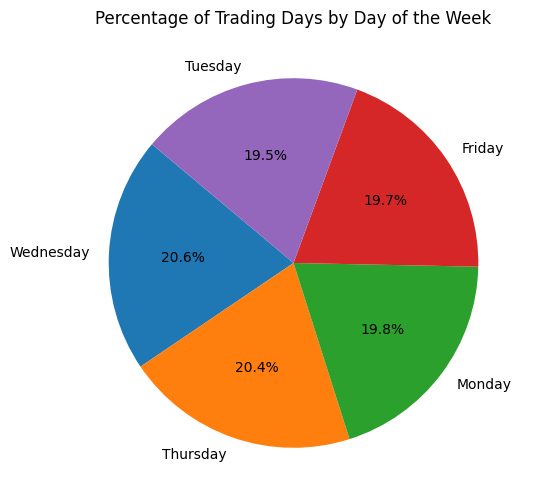

In [22]:
# What is the percentage of Trading Days by Day of the Week? (Using pie chart visualization)

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('gold.csv')

# Convert 'Date' to datetime and extract the day of the week
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()

# Count trading days by weekday and calculate percentages
day_of_week_counts = data['DayOfWeek'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Trading Days by Day of the Week")
plt.show()


Correlation between trading volume and opening price: 0.69


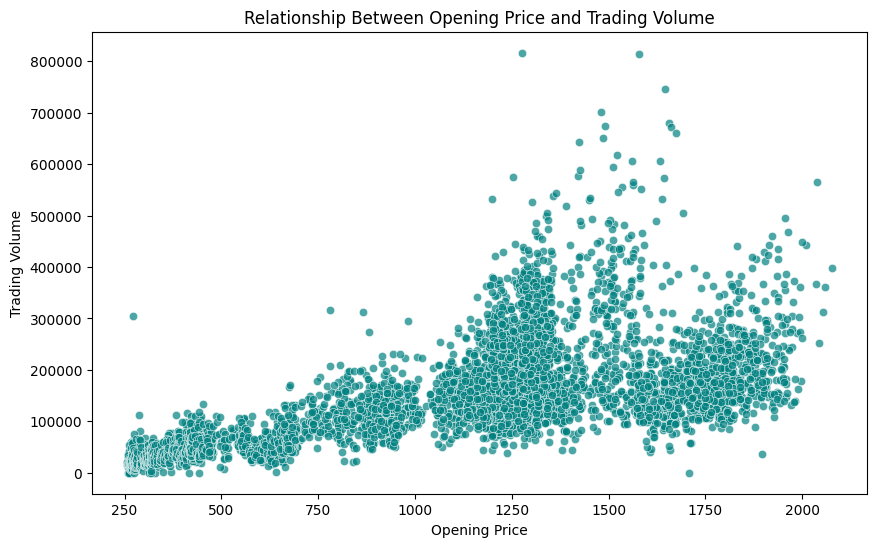

In [23]:
# What is the relationship between the daily trading volume and the opening price?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('gold.csv')

# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with any missing values in the columns of interest
data = data.dropna(subset=['Volume', 'Open'])

# Calculate the correlation coefficient
correlation = data['Volume'].corr(data['Open'])
print(f"Correlation between trading volume and opening price: {correlation:.2f}")

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Volume', data=data, alpha=0.7,color='teal')
plt.title("Relationship Between Opening Price and Trading Volume")
plt.xlabel("Opening Price")
plt.ylabel("Trading Volume")
plt.show()


Month with highest average trading volume: 11 with volume 160230.34
Month with lowest average trading volume: 12 with volume 112788.09


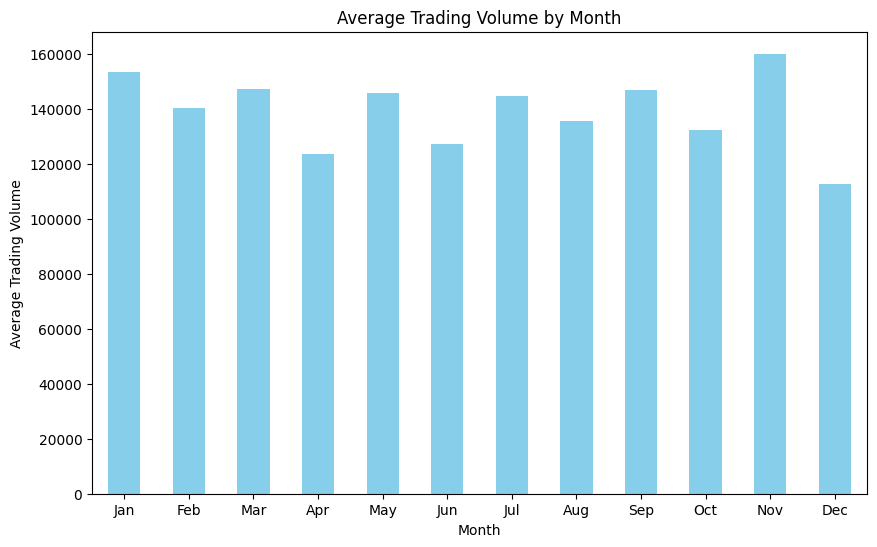

In [24]:
# Which month tends to have the highest or lowest trading volume on average?

import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('gold.csv')

# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract the month from 'Date'
data['Month'] = data['Date'].dt.month

# Calculate average trading volume by month
monthly_avg_volume = data.groupby('Month')['Volume'].mean()

# Identify the highest and lowest average trading volume months
highest_volume_month = monthly_avg_volume.idxmax()
lowest_volume_month = monthly_avg_volume.idxmin()

print(f"Month with highest average trading volume: {highest_volume_month} with volume {monthly_avg_volume[highest_volume_month]:.2f}")
print(f"Month with lowest average trading volume: {lowest_volume_month} with volume {monthly_avg_volume[lowest_volume_month]:.2f}")

# Plotting the average trading volume per month
plt.figure(figsize=(10, 6))
monthly_avg_volume.plot(kind='bar', color='skyblue')
plt.title("Average Trading Volume by Month")
plt.xlabel("Month")
plt.ylabel("Average Trading Volume")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.show()


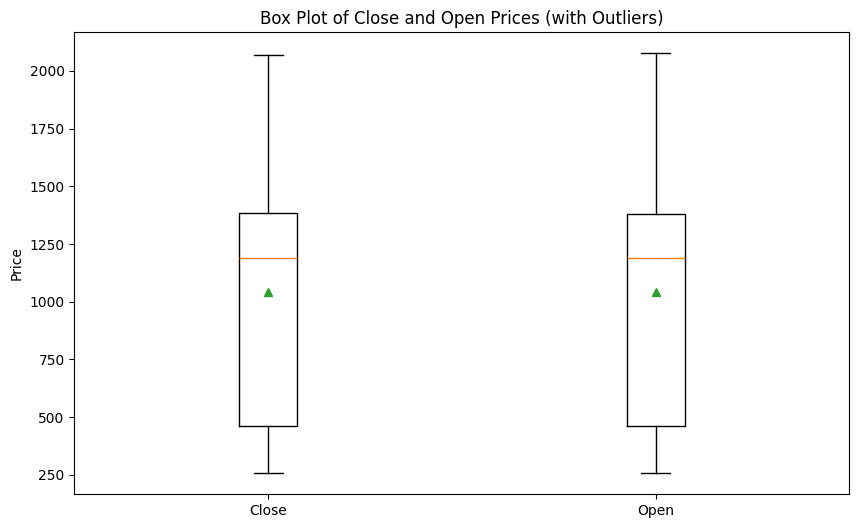

In [25]:
# Are there any anomalies or unexpected price drops/rises? (Detect outliers in `Close` or `Open` prices)

# Create a box plot for 'Close' and 'Open' prices
plt.figure(figsize=(10, 6))  
plt.boxplot([data['Close'], data['Open']], showmeans=True, labels=['Close', 'Open'])
plt.title('Box Plot of Close and Open Prices (with Outliers)')
plt.ylabel('Price') 
plt.grid
plt.show()  


In [26]:
# Check for null values in the dataset 

data.isnull().sum()


Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
Month       0
dtype: int64

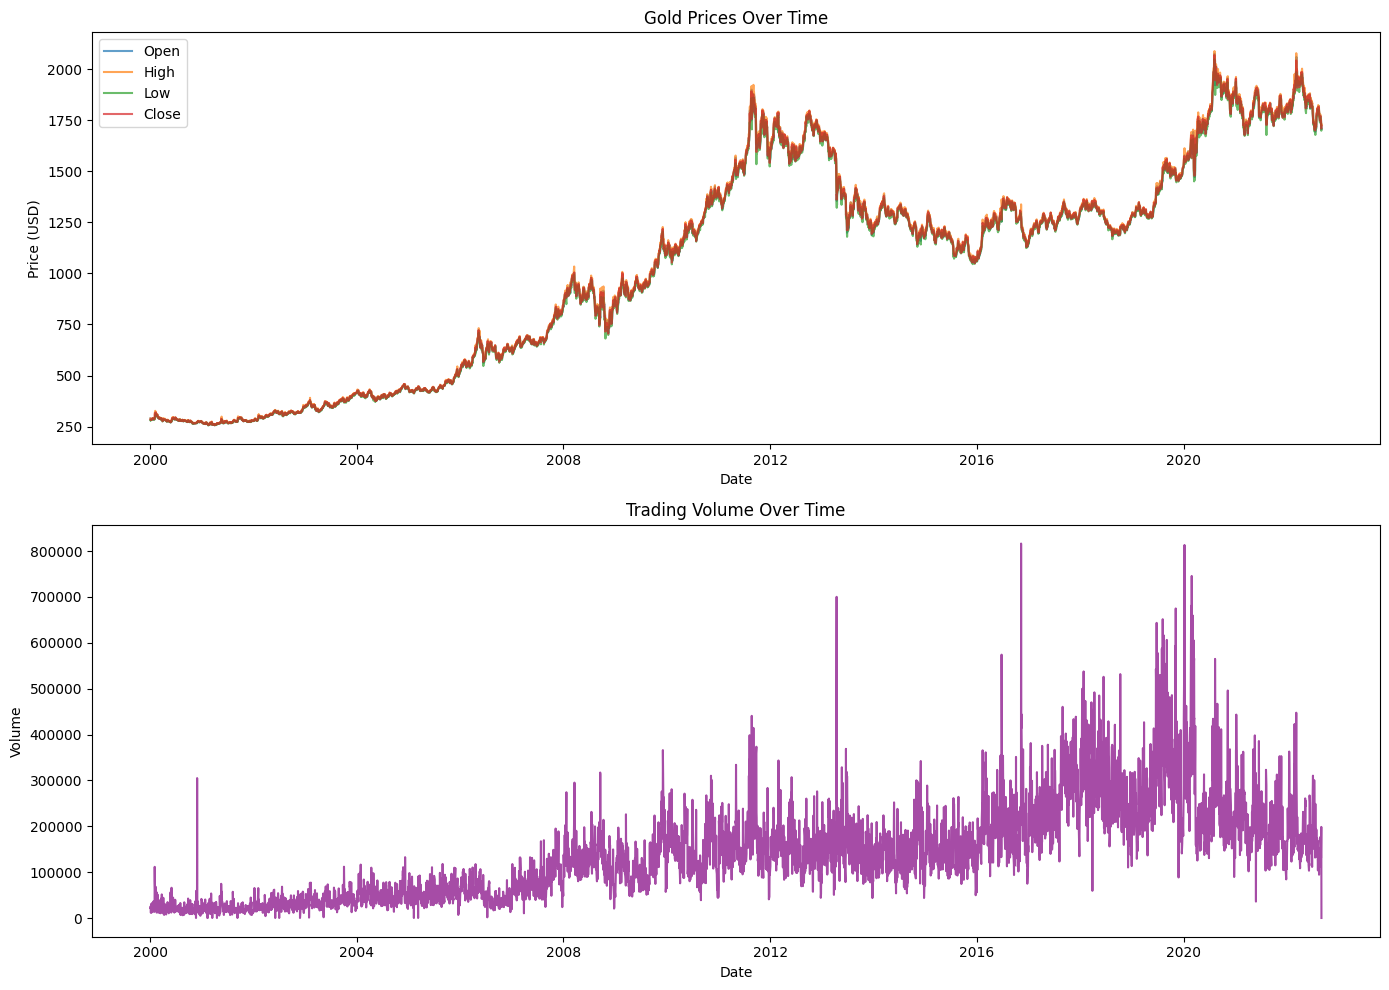

In [27]:
# Plotting time series for Open, High, Low, Close, and Volume to visualize trends and potential outliers

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))

# Plot for Open, High, Low, and Close
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Open'], label='Open', alpha=0.7)
plt.plot(data['Date'], data['High'], label='High', alpha=0.7)
plt.plot(data['Date'], data['Low'], label='Low', alpha=0.7)
plt.plot(data['Date'], data['Close'], label='Close', alpha=0.7)
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Plot for Volume
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['Volume'], color='purple', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()

In [28]:
data = pd.read_csv('gold.csv')

# Filter rows where the Volume is either 0 or 1
filtered_data = data[(data['Volume'] == 0) | (data['Volume'] == 1)]

# Display the filtered rows
filtered_data


,Date,Open,High,Low,Close,Volume,Currency
223,2000-11-21,267.0,267.60,265.90,266.1,0,USD
276,2001-02-09,262.2,263.00,260.70,262.0,0,USD
277,2001-02-12,262.7,263.40,261.90,262.7,0,USD
300,2001-03-16,260.0,261.20,258.00,258.4,0,USD
322,2001-04-18,262.0,263.20,259.20,262.0,0,USD
422,2001-09-10,275.0,275.80,272.70,273.7,0,USD
602,2002-06-04,327.7,331.50,327.70,328.8,0,USD
622,2002-07-02,314.3,316.00,313.00,313.2,0,USD
724,2002-11-26,318.1,318.90,317.10,317.7,0,USD
1271,2005-02-08,415.7,415.80,412.00,414.3,1,USD


In [29]:
data = pd.read_csv('gold.csv')

# Calculate the mean of the Volume column 
volume_mean = data['Volume'].mean()

# Create a new DataFrame after replacements with the mean value
new_data = data.copy()
new_data['Volume'] = new_data['Volume'].replace({0: volume_mean, 1: volume_mean})

# Display the new DataFrame
new_data


,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.50,280.00,283.7,21621.000000,USD
1,2000-01-05,283.7,285.00,281.00,282.1,25448.000000,USD
2,2000-01-06,281.6,282.80,280.20,282.4,19055.000000,USD
3,2000-01-07,282.5,284.50,282.00,282.9,11266.000000,USD
4,2000-01-10,282.4,283.90,281.80,282.7,30603.000000,USD
...,...,...,...,...,...,...,...
5698,2022-08-29,1748.4,1757.90,1731.40,1749.7,156220.000000,USD
5699,2022-08-30,1749.8,1752.80,1732.90,1736.3,130664.000000,USD
5700,2022-08-31,1735.5,1738.00,1720.60,1726.2,176731.000000,USD
5701,2022-09-01,1723.0,1723.00,1699.10,1709.3,198618.000000,USD


In [30]:
# convert categorical features into numbers

from sklearn.preprocessing import LabelEncoder

# Use the modified DataFrame with replaced Volume values
categorical_cols = new_data.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_cols:
    label_enc = LabelEncoder()
    new_data[col] = label_enc.fit_transform(new_data[col])

# Display the new DataFrame
new_data


,Date,Open,High,Low,Close,Volume,Currency
0,0,289.5,289.50,280.00,283.7,21621.000000,0
1,1,283.7,285.00,281.00,282.1,25448.000000,0
2,2,281.6,282.80,280.20,282.4,19055.000000,0
3,3,282.5,284.50,282.00,282.9,11266.000000,0
4,4,282.4,283.90,281.80,282.7,30603.000000,0
...,...,...,...,...,...,...,...
5698,5698,1748.4,1757.90,1731.40,1749.7,156220.000000,0
5699,5699,1749.8,1752.80,1732.90,1736.3,130664.000000,0
5700,5700,1735.5,1738.00,1720.60,1726.2,176731.000000,0
5701,5701,1723.0,1723.00,1699.10,1709.3,198618.000000,0


In [31]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703 entries, 0 to 5702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5703 non-null   int32  
 1   Open      5703 non-null   float64
 2   High      5703 non-null   float64
 3   Low       5703 non-null   float64
 4   Close     5703 non-null   float64
 5   Volume    5703 non-null   float64
 6   Currency  5703 non-null   int32  
dtypes: float64(5), int32(2)
memory usage: 267.5 KB


In [32]:
# Scale numeric features 

from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = new_data.select_dtypes(include=['float64', 'int64','int32']).columns

# Apply StandardScaler
scaler = StandardScaler()
new_data[numeric_cols] = scaler.fit_transform(new_data[numeric_cols])

# Display the scaled DataFrame
new_data


,Date,Open,High,Low,Close,Volume,Currency
0,-1.731747,-1.447658,-1.452857,-1.461601,-1.459266,-1.150892,0.0
1,-1.731140,-1.458840,-1.461473,-1.459657,-1.462352,-1.113500,0.0
2,-1.730532,-1.462889,-1.465685,-1.461212,-1.461774,-1.175964,0.0
3,-1.729925,-1.461154,-1.462430,-1.457713,-1.460809,-1.252069,0.0
4,-1.729317,-1.461347,-1.463579,-1.458102,-1.461195,-1.063131,0.0
...,...,...,...,...,...,...,...
5698,1.729317,1.365016,1.358510,1.359880,1.368237,0.164247,0.0
5699,1.729925,1.367715,1.348746,1.362796,1.342392,-0.085456,0.0
5700,1.730532,1.340145,1.320410,1.338885,1.322912,0.364655,0.0
5701,1.731140,1.316046,1.291691,1.297089,1.290317,0.578509,0.0


In [33]:
# Simple linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target and features
X = new_data.drop(columns=['Close'])  # Drop the target column from features
y = new_data['Close']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 8.168701118529536e-05
Mean Absolute Error: 0.005759493032009634
R2 Score: 0.9999219209799405


In [34]:
# Polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Define target and features
X = new_data.drop(columns=['Close'])  # Drop the target column from features
y = new_data['Close']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the degree of the polynomial (e.g., degree=2 for quadratic)
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the linear regression model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 8.107603019205793e-05
Mean Absolute Error: 0.0057695031944732045
R2 Score: 0.9999225049748319


In [35]:
# Multivariate regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target and features, dropping 'Close', 'Date', and 'Currency' columns from features
X = new_data.drop(columns=['Close', 'Date', 'Currency'])
y = new_data['Close']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 8.178495845181675e-05
Mean Absolute Error: 0.005759322228065918
R2 Score: 0.9999218273588558


In [36]:
# Lasso, Ridge, ElasticNet regression

from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target and features
X = new_data.drop(columns=['Close'])  # Drop the target column from features
y = new_data['Close']  # Target column

# Feature scaling: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models with regularization parameters and increase max_iter for ElasticNet
models = {
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000),  # L1 regularization
    "Ridge Regression": Ridge(alpha=0.1),  # L2 regularization
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)  # Combination of L1 and L2 regularization
}

# Train, predict, and evaluate each model
for name, model in models.items():

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display results
    print(f"\n{name} Results:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R2 Score:", r2)



Lasso Regression Results:
Mean Squared Error: 0.010861235860776796
Mean Absolute Error: 0.09121692989479609
R2 Score: 0.9896184884189093

Ridge Regression Results:
Mean Squared Error: 8.631256144976142e-05
Mean Absolute Error: 0.0059948346844172435
R2 Score: 0.9999174997332007

ElasticNet Regression Results:
Mean Squared Error: 0.00482571189324958
Mean Absolute Error: 0.05873842881899407
R2 Score: 0.995387432466346


In [37]:
# KNN regression

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target and features
X = new_data.drop(columns=['Close'])  # Drop the target column from features
y = new_data['Close']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors for tuning
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 0.0006465733365091693
Mean Absolute Error: 0.016656467095425485
R2 Score: 0.9993819848250203


In [38]:
# Decision Tree regression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target and features
X = new_data.drop(columns=['Close'])  # Drop the target column from features
y = new_data['Close']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree regressor model
dt_model = DecisionTreeRegressor(random_state=42)  # Random state for reproducibility
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 0.00027704385909169837
Mean Absolute Error: 0.010110820532853445
R2 Score: 0.999735192747078


In [39]:
# Random Forest regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target and features
X = new_data.drop(columns=['Close'])  # Drop the target column from features
y = new_data['Close']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 0.00015174515819874556
Mean Absolute Error: 0.007714146657276197
R2 Score: 0.9998549571947973


In [40]:
# AdaBoost regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target and features
X = new_data.drop(columns=['Close'])  # Drop the target column from features
y = new_data['Close']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost regressor model
ada_model = AdaBoostRegressor(n_estimators=50, random_state=42)  # You can adjust n_estimators for tuning
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 0.003416863061325276
Mean Absolute Error: 0.04551049621752867
R2 Score: 0.9967340545867114


In [41]:
# Support Vector Regression

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define target and features
X = new_data.drop(columns=['Close'])  # Drop the target column from features
y = new_data['Close']  # Target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (important for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Using the RBF kernel; you can experiment with 'linear' or 'poly'
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Squared Error: 0.0023661953559654145
Mean Absolute Error: 0.033981943421527175
R2 Score: 0.9977383158964637
